About Dataset
Context

Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content

Attributes

People :

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products :

* 🍾 MntWines: Amount spent on wine in last 2 years
* 🍓 MntFruits: Amount spent on fruits in last 2 years
* 🥩 MntMeatProducts: Amount spent on meat in last 2 years
* 🐟 MntFishProducts: Amount spent on fish in last 2 years
* 🍬 MntSweetProducts: Amount spent on sweets in last 2 years
* 🧈 MntGoldProds: Amount spent on gold in last 2 years

Promotion :

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place :

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

Target :

Need to perform clustering to summarize customer segments.

Acknowledgement :

The dataset for this project is provided by Dr. Omar Romero-Hernandez. 

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings

In [2]:
path = r"C:\Users\CC-Student\Desktop\Data\marketing_campaign.csv"
df = pd.read_csv(path, sep='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe(include='O')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


# Data Cleaning

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df['Income'].fillna(df['Income'].median(), inplace=True)

C:\Users\CC-Student\AppData\Local\Temp\ipykernel_14260\1959487941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [8]:
print('Missing Values :',df.isnull().sum().sum())

Missing Values : 0


In [9]:
df.duplicated().sum()

0

In [10]:
df['Age'] = 2025 - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)


# Exploratory Data Analysis

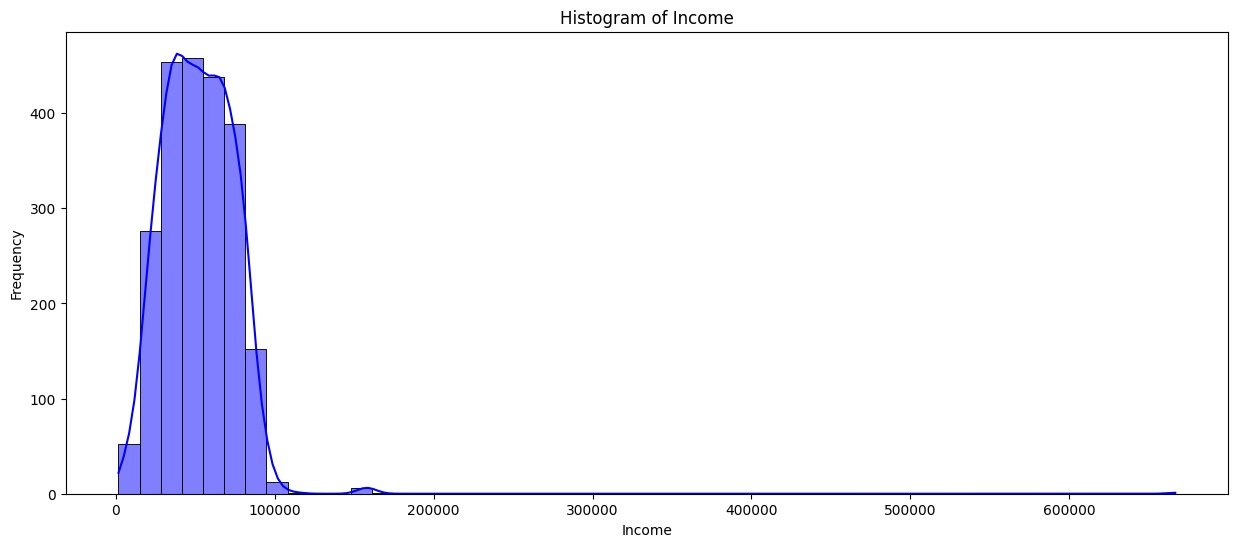

In [11]:
sns.histplot(df['Income'], bins=50, color='blue', edgecolor='black', kde=True).figure.set_size_inches(15, 6)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


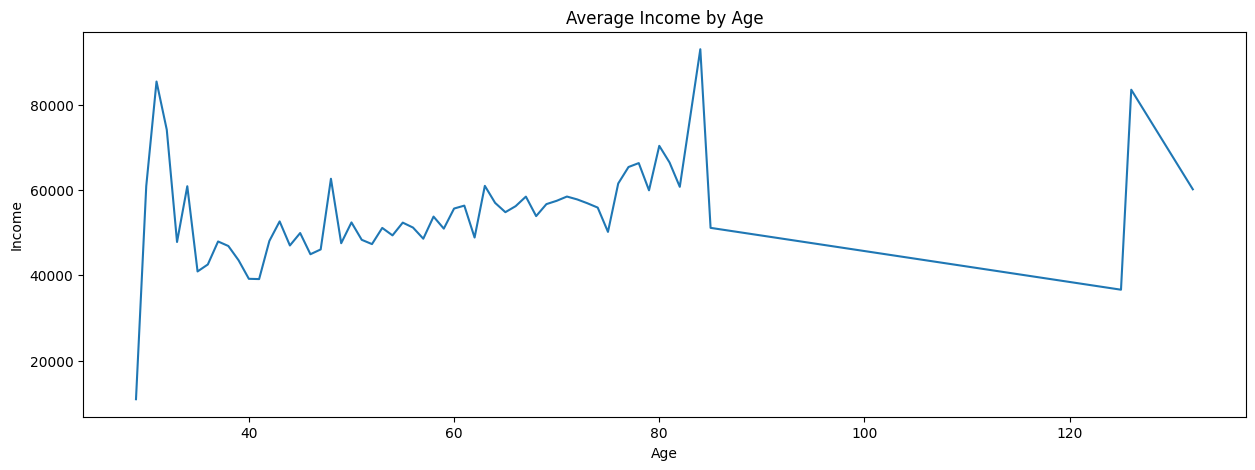

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [12]:
income_by_Age = df.groupby('Age')['Income'].mean()
income_by_Age.plot(kind='line', figsize=(15,5))
plt.title('Average Income by Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()
df.Income.describe()

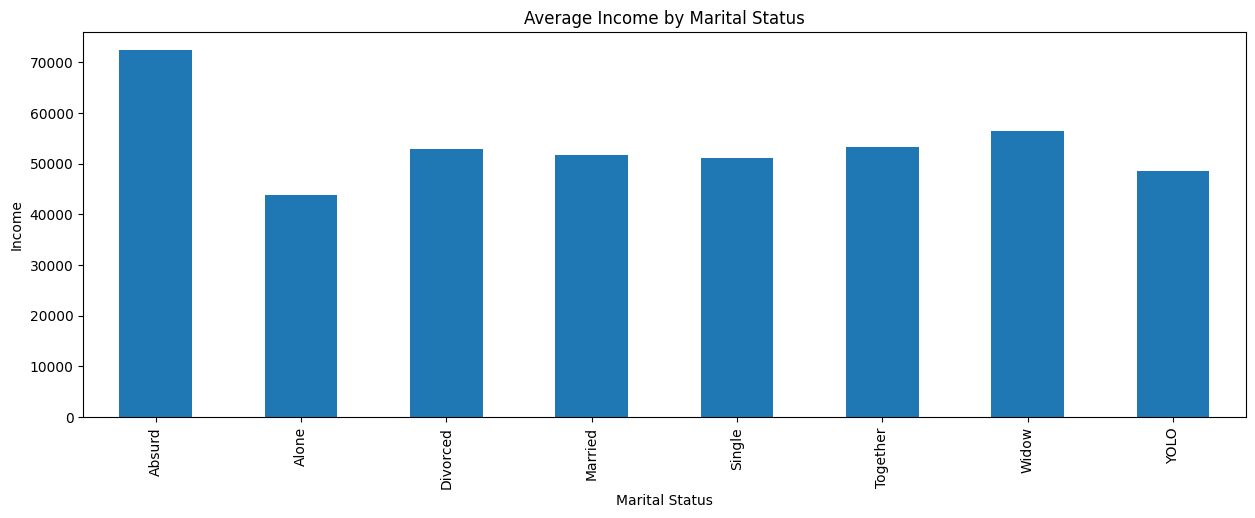

In [13]:
df.groupby("Marital_Status")["Income"].mean().plot(kind='bar', figsize=(15,5))
plt.title('Average Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()

C:\Users\CC-Student\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\CC-Student\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\CC-Student\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\CC-Student\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users

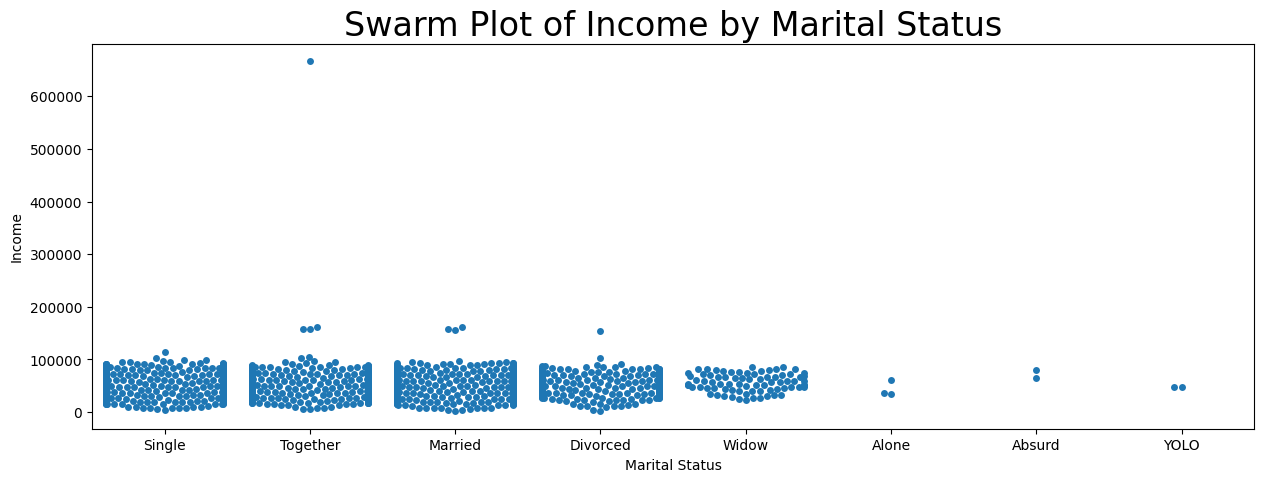

In [14]:
plt.figure(figsize=(15, 5))
sns.swarmplot(x='Marital_Status', y='Income', data=df)
plt.title('Swarm Plot of Income by Marital Status', size=24)
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()

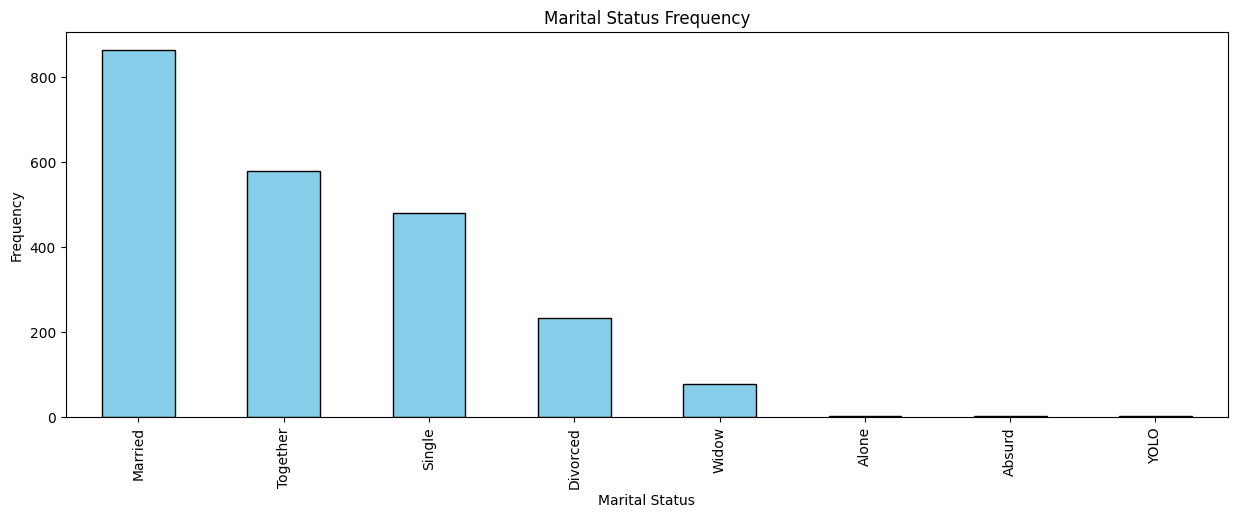

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [15]:
Marital_Status_freq = df['Marital_Status'].value_counts()
Marital_Status_freq.plot(kind='bar', figsize=(15,5), color='skyblue', edgecolor='black')

plt.title('Marital Status Frequency')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

print(df['Marital_Status'].value_counts())

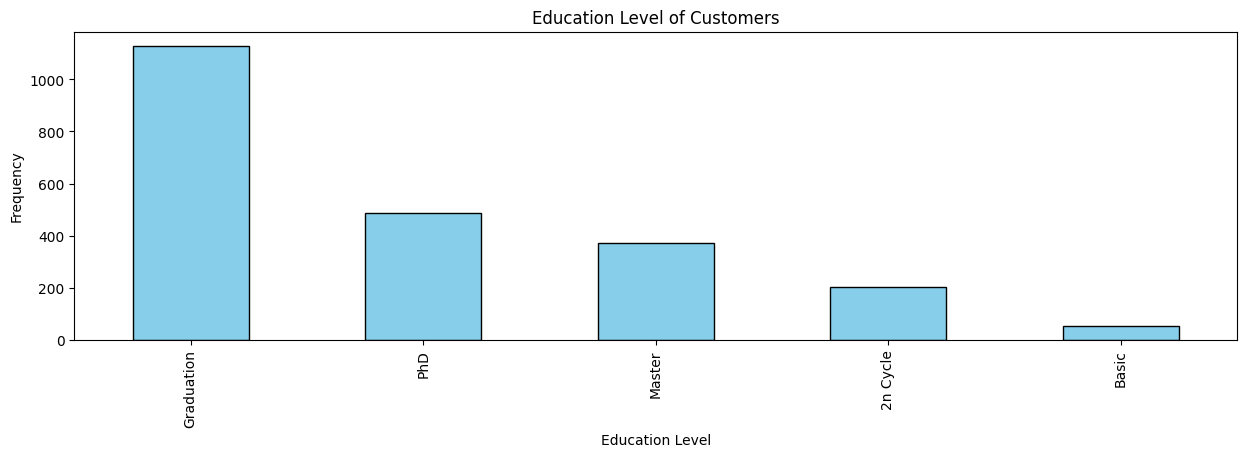

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [16]:
df["Education"].value_counts().plot(kind='bar', color='skyblue', edgecolor='black').figure.set_size_inches(15, 4)
plt.title('Education Level of Customers')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

print(df["Education"].value_counts())

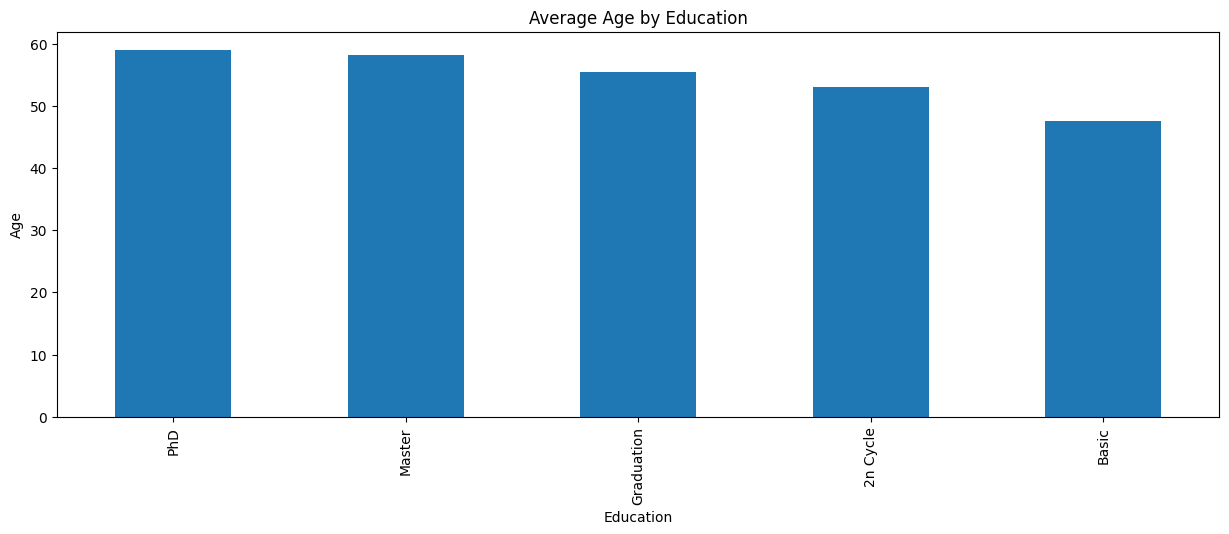

Average Age by 
Education
PhD           58.956790
Master        58.121622
Graduation    55.364685
2n Cycle      52.975369
Basic         47.537037
Name: Age, dtype: float64


In [17]:
Age_by_education = df.groupby('Education')['Age'].mean()
Age_by_education.sort_values(ascending=False).plot(kind='bar', figsize=(15,5))
plt.title('Average Age by Education')
plt.xlabel('Education')
plt.ylabel('Age')
plt.show()
print('Average Age by ')
print(Age_by_education.sort_values(ascending=False))

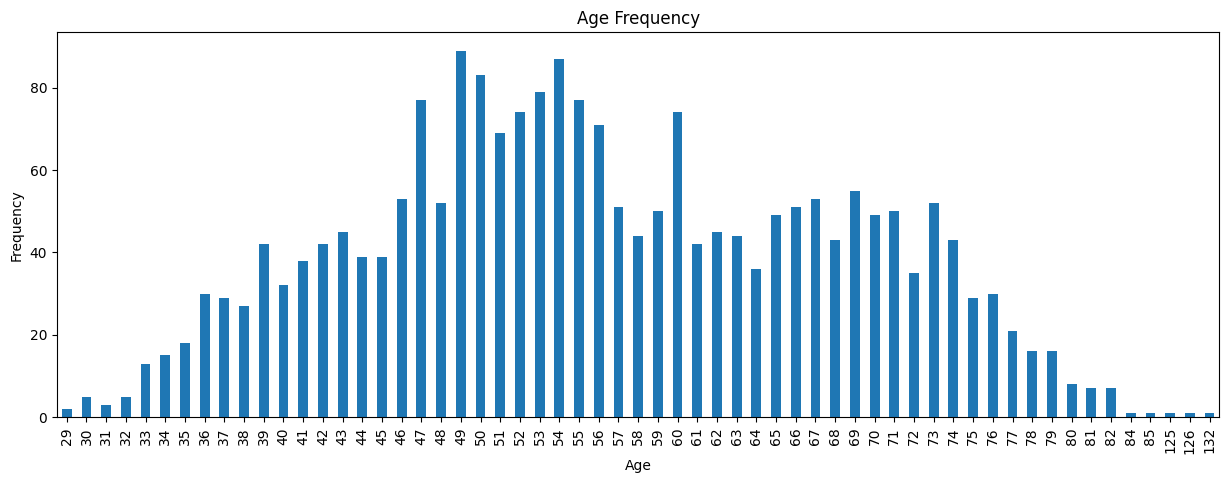

In [18]:
Age_freq = df['Age'].value_counts().sort_index()
Age_freq.plot(kind='bar', figsize=(15,5))

plt.title('Age Frequency')
plt.xlabel('Age')

plt.ylabel('Frequency')
plt.show()

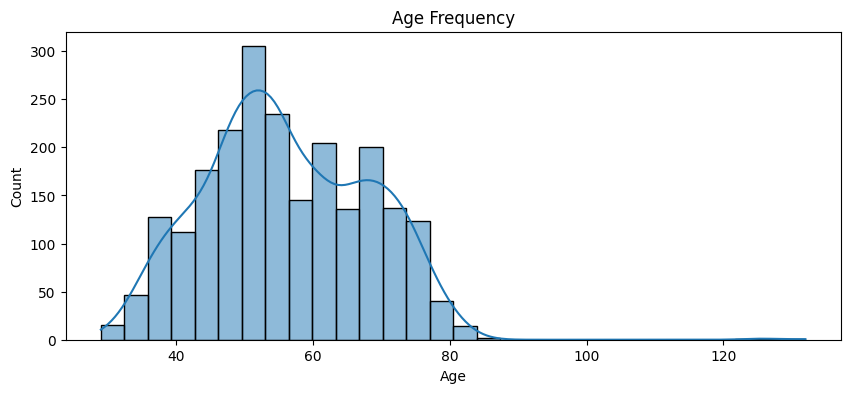

In [19]:
plt.figure(figsize=(10, 4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Frequency")
plt.show()


In [20]:
def age_category(age):
    if age <= 40:
        return '20-40'
    elif age <= 60:
        return '40-60'
    elif age <= 80:
        return '60-80'
    elif age <= 100:
        return '80-100'
    elif age <= 120:
        return '100-120'
    else:
        return '130'

df['Age_Category'] = df['Age'].apply(age_category)


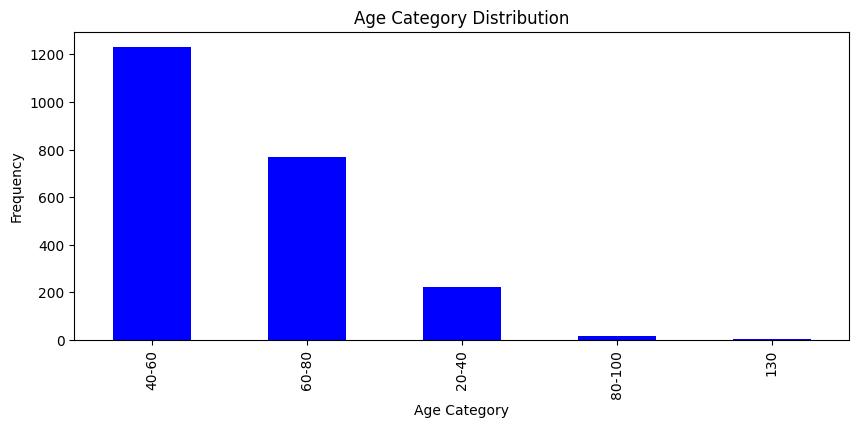

Age_Category
40-60     1233
60-80      767
20-40      221
80-100      16
130          3
Name: count, dtype: int64


In [21]:
df['Age_Category'].value_counts()

df['Age_Category'].value_counts().plot(kind='bar', figsize=(10,4), color='Blue')
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.show()
print(df['Age_Category'].value_counts())


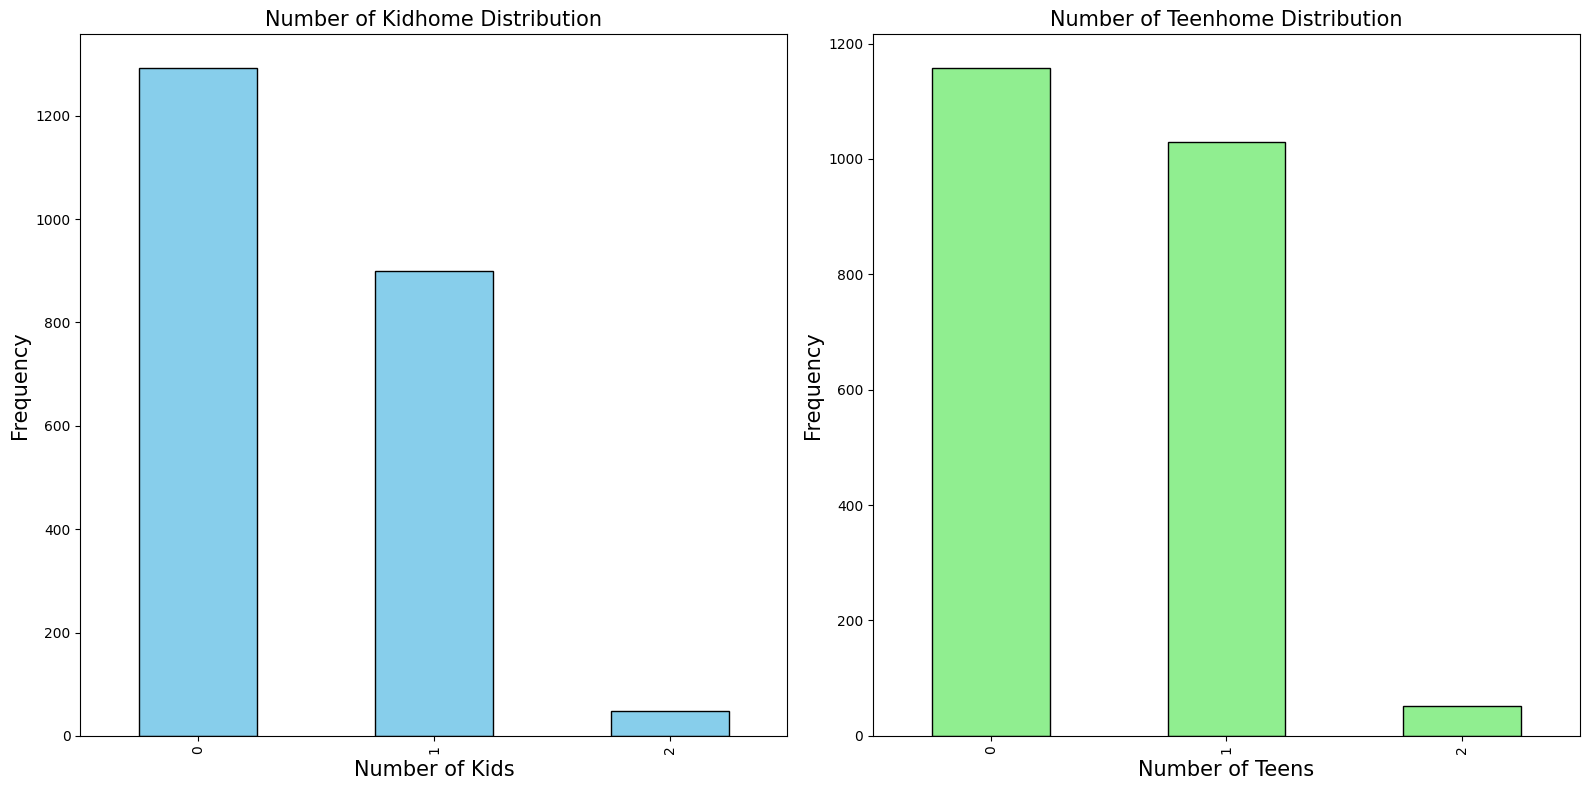

In [22]:
plt.figure(figsize=(16, 8))

# Plot for Kidhome
plt.subplot(1, 2, 1)
df['Kidhome'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Kidhome Distribution', size=15)
plt.xlabel('Number of Kids', size=15)
plt.ylabel('Frequency', size=15)

# Plot for Teenhome
plt.subplot(1, 2, 2)
df['Teenhome'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Teenhome Distribution', size=15)
plt.xlabel('Number of Teens', size=15)
plt.ylabel('Frequency', size=15)

plt.tight_layout()
plt.show()


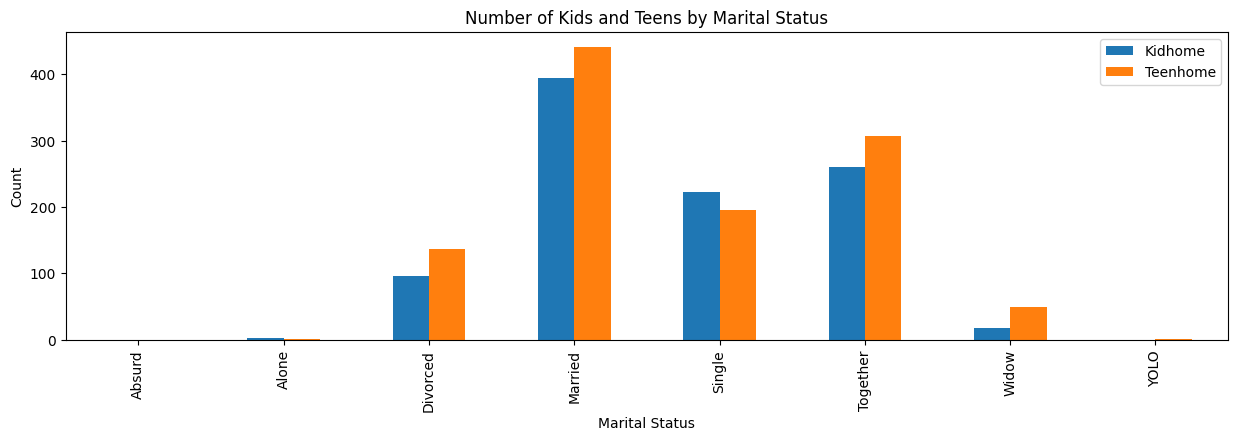

                Kidhome  Teenhome
Marital_Status                   
Absurd                0         0
Alone                 3         2
Divorced             96       137
Married             394       442
Single              223       195
Together            261       307
Widow                18        49
YOLO                  0         2


In [23]:
kids_teens_by_marital_status = df.groupby('Marital_Status')[['Kidhome', 'Teenhome']].sum()
kids_teens_by_marital_status.plot(kind='bar', figsize=(15, 4))
plt.title('Number of Kids and Teens by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

print(kids_teens_by_marital_status)


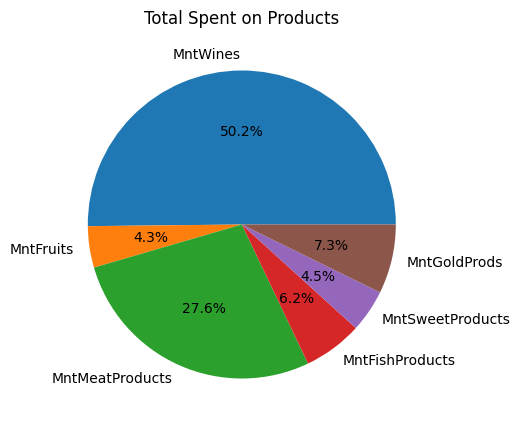

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64


In [24]:
product_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
total_spent = df[product_columns].sum()
plt.figure(figsize=(10, 5))
plt.pie(total_spent, labels=product_columns, autopct='%1.1f%%')
plt.title("Total Spent on Products")
plt.show()
print(total_spent)

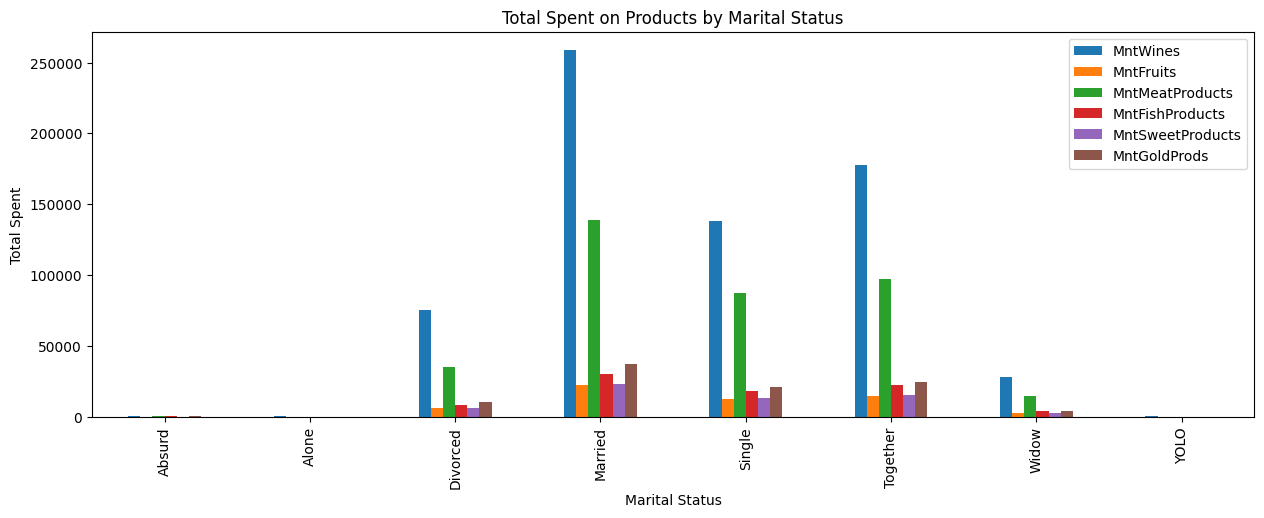

In [25]:
total_spent_by_Marital_Status = df.groupby('Marital_Status')[product_columns].sum()
total_spent_by_Marital_Status.plot(kind='bar', figsize=(15,5))
plt.title('Total Spent on Products by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spent')
plt.show()

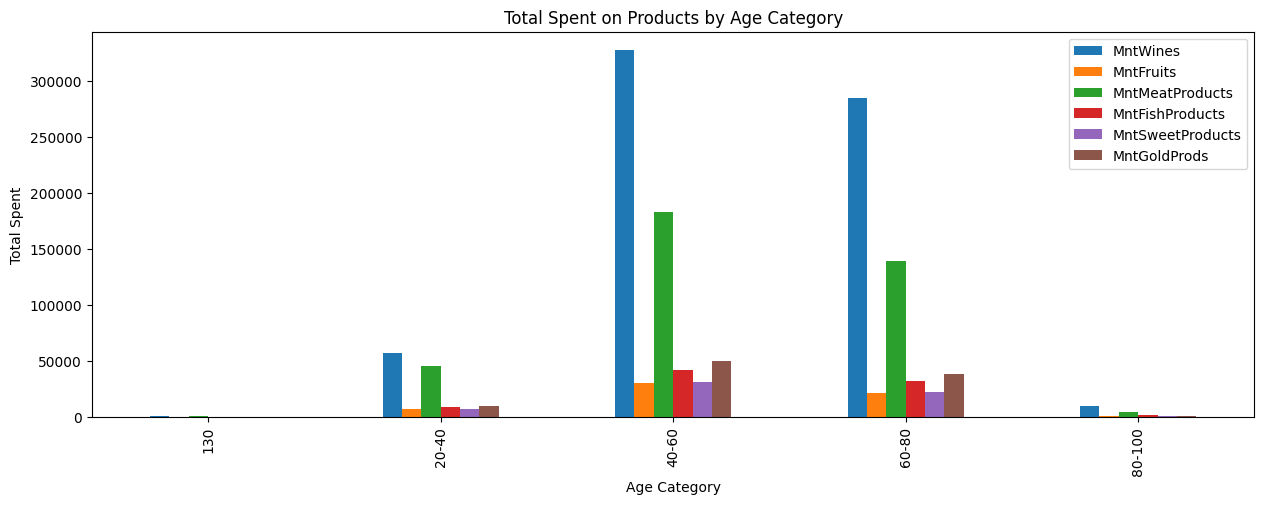

In [26]:
total_spent_by_Marital_Status_Age_category = df.groupby('Age_Category')[product_columns].sum()
total_spent_by_Marital_Status_Age_category.plot(kind='bar', figsize=(15,5))
plt.title('Total Spent on Products by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Spent')
plt.show()

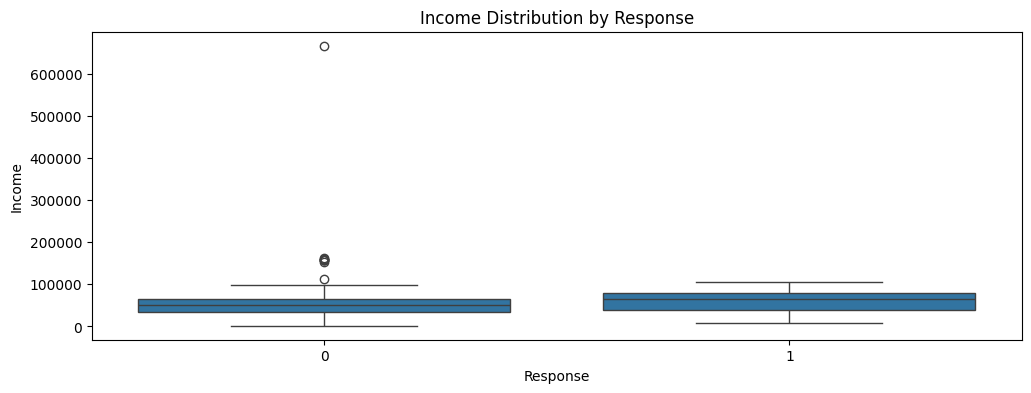

In [27]:
plt.figure(figsize=(12, 4))
sns.boxplot(x="Response", y="Income", data=df)
plt.title("Income Distribution by Response")
plt.show()

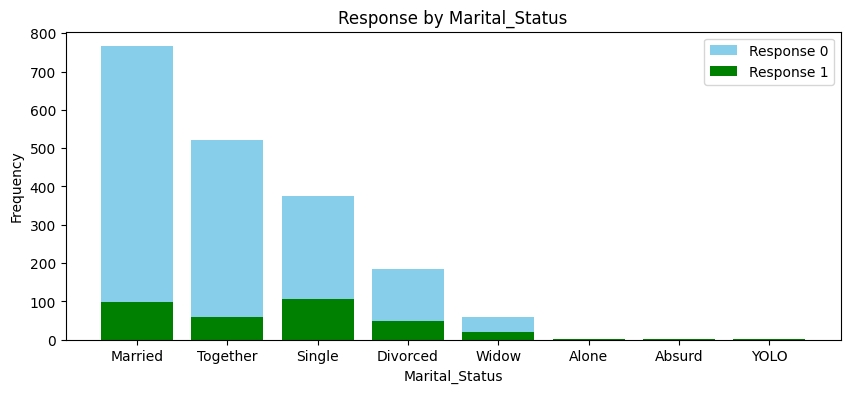

In [28]:
Response0_in_Age_category = df[df['Response'] == 0]['Marital_Status'].value_counts()
Response1_in_Age_category = df[df['Response'] == 1]['Marital_Status'].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(Response0_in_Age_category.index, Response0_in_Age_category.values, label='Response 0', color='skyblue')
plt.bar(Response1_in_Age_category.index, Response1_in_Age_category.values, label='Response 1', color='green')
plt.title('Response by Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency')
plt.legend()
plt.show()


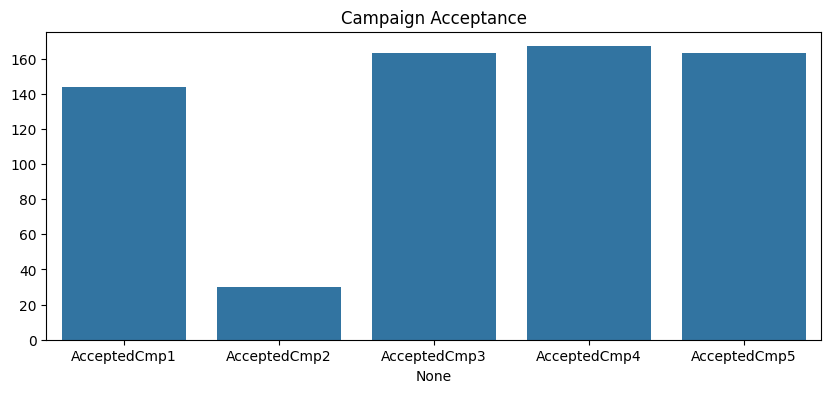

In [29]:
campaigns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
acceptance = df[campaigns].sum()

plt.figure(figsize=(10, 4))
sns.barplot(x=acceptance.index, y=acceptance.values)
plt.title("Campaign Acceptance")
plt.show()

In [30]:
df['Complain'].value_counts()


Complain
0    2219
1      21
Name: count, dtype: int64

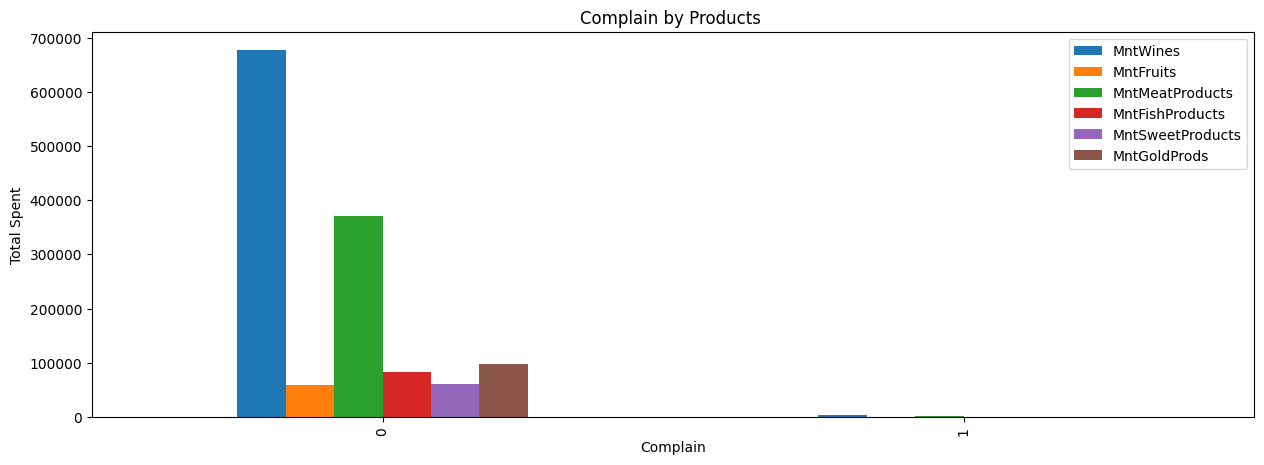

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Complain,,,,,,
0,677267,58409,371606,83516,60253,98032
1,3549,508,2362,541,368,577


In [31]:
Complain_by_Total_Spent = df.groupby('Complain')[product_columns].sum()
Complain_by_Total_Spent.plot(kind='bar', figsize=(15,5))
plt.title('Complain by Products ')
plt.xlabel('Complain')
plt.ylabel('Total Spent')
plt.show()
Complain_by_Total_Spent

In [32]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').dt.year

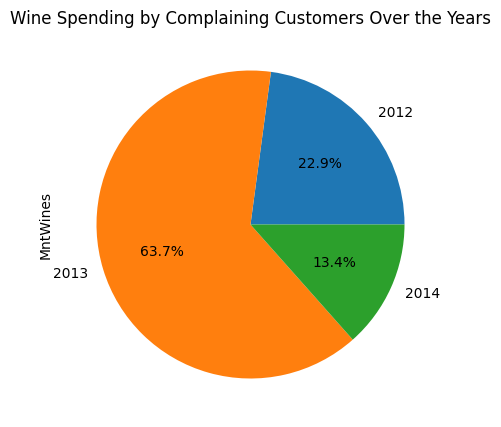

Dt_Customer
2012     812
2013    2260
2014     477
Name: MntWines, dtype: int64


In [33]:
complain_wine_customers = df[df['Complain'] == 1][['Dt_Customer', 'MntWines']]
complain_wine_customers['Dt_Customer'] = complain_wine_customers['Dt_Customer'].astype('str')
complain_wine_customers = complain_wine_customers.groupby('Dt_Customer')['MntWines'].sum()
complain_wine_customers.plot(kind='pie', figsize=(12,5), autopct='%1.1f%%')
plt.title('Wine Spending by Complaining Customers Over the Years')
plt.show()
print(complain_wine_customers)


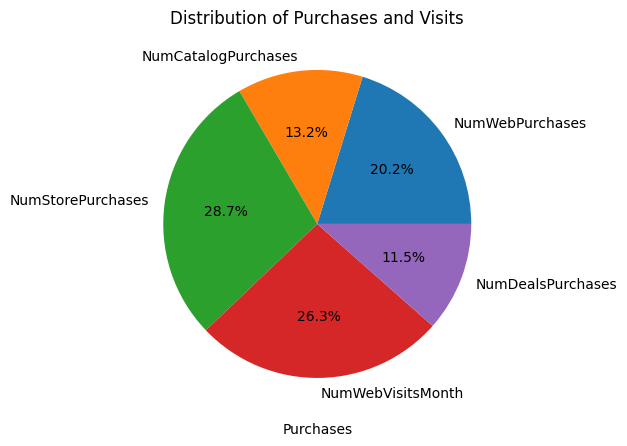

In [34]:
NumPurchases = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']]
NumPurchases.sum().plot(kind='pie', figsize=(15,5), autopct='%1.1f%%')
plt.title('Distribution of Purchases and Visits')
plt.xlabel('Purchases')
plt.show()




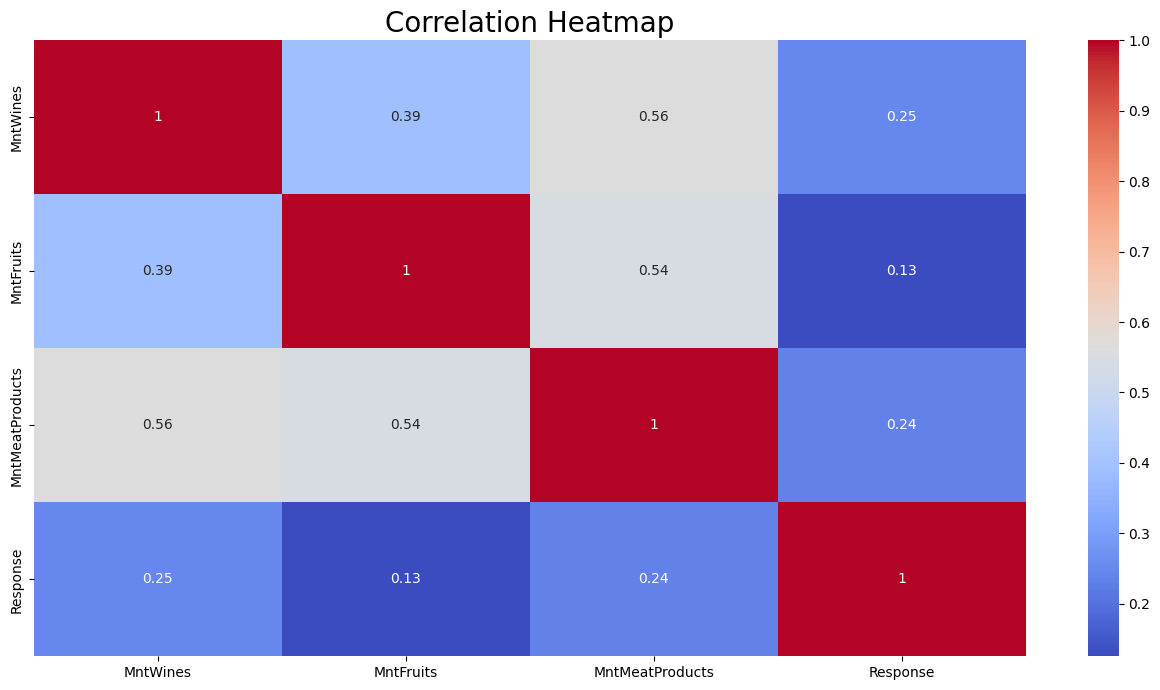

In [35]:
plt.figure(figsize=(16, 8))
sns.heatmap(df[["MntWines", "MntFruits", "MntMeatProducts", "Response"]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', size=20)
plt.show()



* Datenbereinigung:

    + Fehlende Werte im Einkommensattribut wurden durch den Medianwert ersetzt.
    + Das Attribut Year_Birth wurde in Age umgewandelt.

* Explorative Datenanalyse (EDA):

    Demographische Merkmale:
    + Die meisten Kunden haben einen Abschluss (Graduation) oder einen PhD.
    + Der größte Anteil der Kunden ist verheiratet oder lebt in einer Partnerschaft.
    + Die Altersverteilung zeigt, dass die meisten Kunden zwischen 40 und 60 Jahre alt sind.

    # Einkommen:
    + Das durchschnittliche Jahreseinkommen der Kunden beträgt ca. 52.238 USD.
    + Kunden mit einem höheren Bildungsabschluss (PhD, Master) haben tendenziell ein höheres Einkommen.
    + Verheiratete Kunden und solche in einer Partnerschaft haben im Durchschnitt höhere Einkommen.

    # Kaufverhalten:
    + Die meisten Kunden tätigen ihre Käufe über das Internet oder direkt in den Filialen.
    + Kunden, die auf Aktionen reagieren, machen häufigere Käufe.

    # Alter und Einkommensverteilung:
    + Ältere Kunden (über 60 Jahre) haben im Durchschnitt ein höheres Einkommen.
    + Die Einkommensverteilung ist recht breit, wobei einige Kunden sehr hohe Einkommen aufweisen.
    + Ältere Kunden haben tendenziell höhere Ausgaben für Wein und Fleischprodukte.

    # Marital_Status:

    + Der größte Anteil der Kunden ist verheiratet (864), gefolgt von Kunden in einer Partnerschaft (580) und Singles (480).
    + Weitere Kategorien umfassen geschiedene Kunden, Witwen/Witwer und einige wenige in den Kategorien "Allein", "Absurd" und "YOLO".



